# Raw data

Start importing wavepal and other usual packages

In [1]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import wavepal as wv

In [2]:
mypath="../../figures/effect_interpolation/"

## 1. Reading the data and initializing Wavepal

Read the data

In [3]:
data=np.genfromtxt("GISP2/GISP2d18O.txt")
myt=data[:,0]
mydata=data[:,1]

Remove the mean of the data

In [4]:
mydata-=np.mean(mydata)

Initialize the class called Wavepal (which is a class of the package wv)

In [5]:
x=wv.Wavepal(myt, mydata, t_axis_label="Age", mydata_axis_label="$\delta{}^{18}O$", t_units="a", mydata_units="permil")

## 2. Preliminary analysis

Check the data set

In [6]:
x.check_data()

Figure timestep

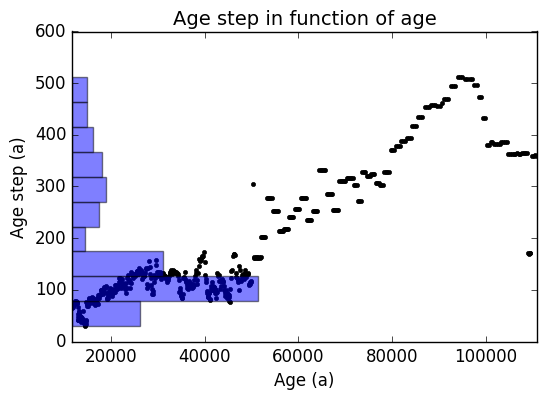

In [7]:
plot_timestep=x.plot_timestep()
plot_timestep.title("Age step in function of age",fontsize=14)
plot_timestep.savefig(mypath+"plot_timestep.pdf")
plot_timestep.show()

Minimum time step

In [8]:
np.min(x.dt)

30.0

Figure of the trend.

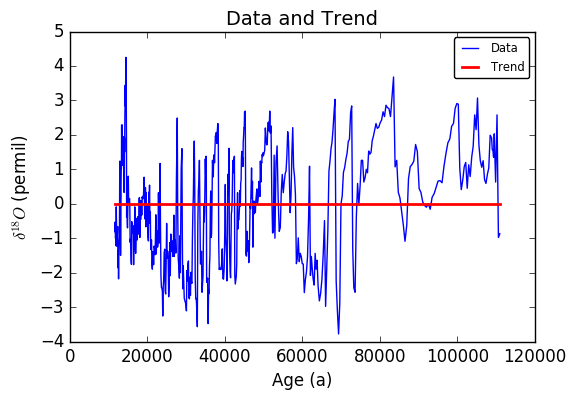

In [9]:
plot_trend=x.plot_trend(pol_degree=-1)  
plot_trend.show()

and choose the degree of the polynomial for the subsequent analyses

In [10]:
x.choose_trend_degree(-1)

Compute some variables related to the trend

In [11]:
x.trend_vectors()

## 3. CARMA(p,q) Background Noise Analysis

Analytical confidence levels

In [12]:
x.carma_params(signif_level_type="a")

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  18

SECOND ROUND: generates  18000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples):  17
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  1059  MCMC samples.
Median parameters:
--------------------
alpha:  0.00118613456453
std white noise:  0.0808322833882


## 4. Time-Frequency Analysis

Define the times at which the CWT (continuous wavelet transform) is to be computed

In [13]:
theta=np.linspace(myt[0],myt[-1],int(np.floor((myt[-1]-myt[0])/30.)))

In [14]:
x.timefreq_analysis(theta=theta,w0=15.,smoothing_coeff=0.)

  0%|          | 5/3310 [00:00<01:21, 40.40it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  5%|▍         | 6/132 [00:00<00:02, 57.42it/s]

Re-estimated period range: from  73.8687386694  to  6921.61047445
Main loop, over the time-frequency plane:


100%|██████████| 132/132 [13:59<00:00,  6.79s/it]


Figure of the scalogram

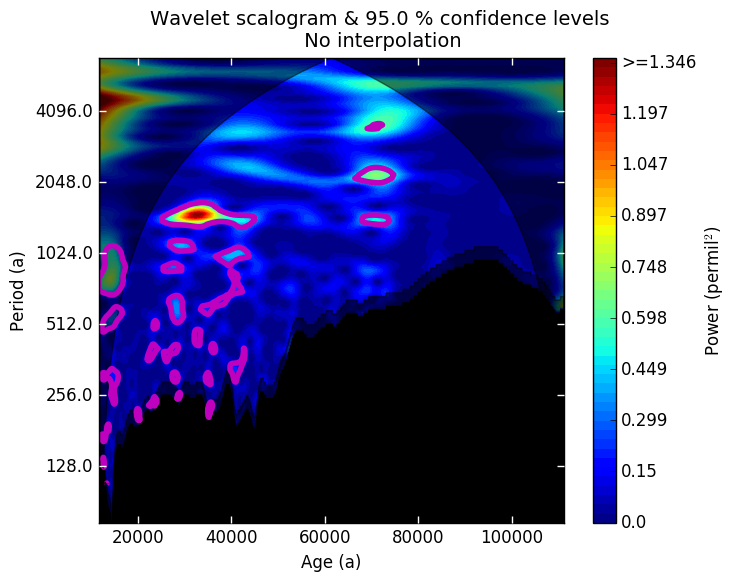

In [15]:
plot_scalogram=x.plot_scalogram(linewidth_cl=4,with_global_scalogram=False)
plot_scalogram.suptitle("Wavelet scalogram & 95.0 % confidence levels\n No interpolation",fontsize=14)
fig = plt.gcf() 
fig.set_size_inches(7.5,6)
plot_scalogram.savefig(mypath+"scalogram_w0_15.pdf")
plot_scalogram.show() 

# Interpolated data 1

Spline interp. with dt=30yr (which is the minimum of the time steps of the  raw data) 

Start importing wavepal and other usual packages

In [16]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import wavepal as wv
from scipy.interpolate import interp1d
import os

In [17]:
mypath="../../figures/effect_interpolation/"

## 1. Reading the data, spline interpolation, and initializing Wavepal

In [18]:
data=np.genfromtxt("GISP2/GISP2d18O.txt")
myt=data[:,0]
myt_interp=np.linspace(myt[0],myt[-1],int(np.floor((myt[-1]-myt[0])/30.)))
mydata=data[:,1]
mydata_cont_interp=interp1d(myt,mydata,kind='cubic')
mydata_interp=mydata_cont_interp(myt_interp)
myt=myt_interp
mydata=mydata_interp

Remove the mean of the data

In [19]:
mydata-=np.mean(mydata)

Initialize the class called Wavepal (which is a class of the package wv)

In [20]:
x=wv.Wavepal(myt, mydata, t_axis_label="Age", mydata_axis_label="$\delta{}^{18}O$", t_units="a", mydata_units="permil")

## 2. Preliminary analysis

Check the data set

In [21]:
x.check_data()

Figure of the trend.

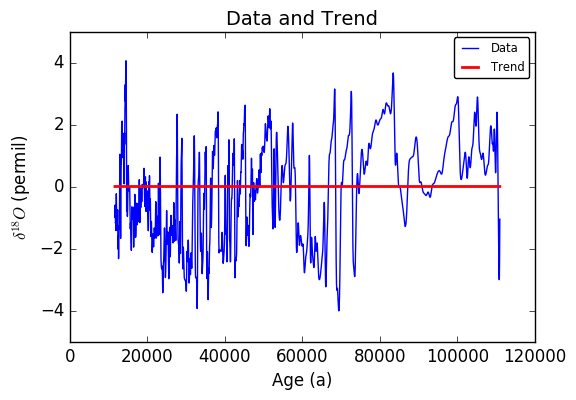

In [22]:
plot_trend=x.plot_trend(pol_degree=-1)  
plot_trend.show()

and choose the degree of the polynomial for the subsequent analyses

In [23]:
x.choose_trend_degree(-1)

Compute some variables related to the trend

In [24]:
x.trend_vectors()

## 3. CARMA(p,q) Background Noise Analysis

Analytical confidence levels

In [25]:
x.carma_params(signif_level_type="a")

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  308

SECOND ROUND: generates  308000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples):  1225
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  252  MCMC samples.
Median parameters:
--------------------
alpha:  0.000167525282345
std white noise:  0.0342140111108


In [26]:
sig_wn=x.sigwn_unique
alpha_rn=x.alpha_unique

## 4. Time-Frequency Analysis

In [27]:
os.chdir('../CWT_regularly_sampled')
from CWT_classical import CWT_Morlet_regularly_sampled

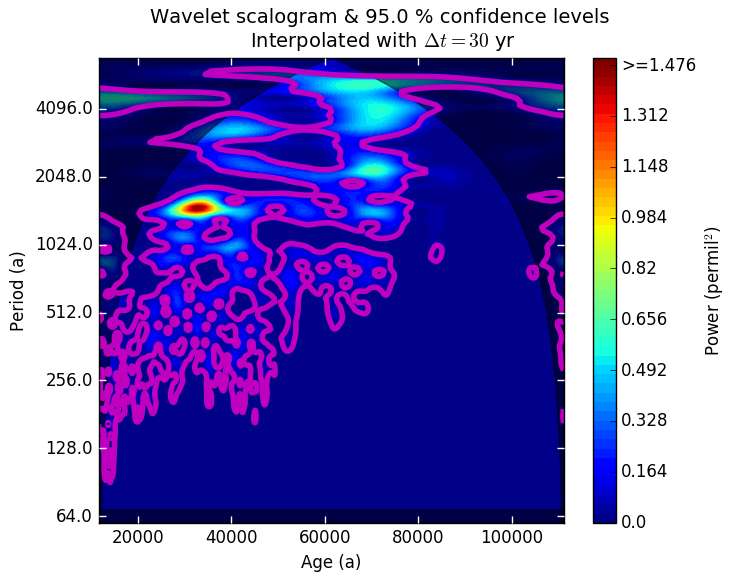

In [28]:
myplot=CWT_Morlet_regularly_sampled(myt,mydata,w0=15.,alpha_rn=alpha_rn,sigma_wn=sig_wn,t_axis_label="Age", mydata_axis_label="$\delta{}^{18}O$", t_units="a", mydata_units="permil",linewidth_cl=4)
myplot.suptitle("Wavelet scalogram & 95.0 % confidence levels\n Interpolated with $\Delta t=30$ yr",fontsize=14)
fig = plt.gcf() 
fig.set_size_inches(7.5,6)
myplot.savefig(mypath+"scalogram_w0_15_interpolated_data_30yr.pdf")
myplot.show()

In [29]:
os.chdir('../effect_interpolation')

# Interpolated data 2

Spline interp. with dt=300yr.

In [30]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import wavepal as wv
from scipy.interpolate import interp1d
import os

In [31]:
mypath="../../figures/effect_interpolation/"

## 1. Reading the data, spline interpolation, and initializing Wavepal

In [32]:
data=np.genfromtxt("GISP2/GISP2d18O.txt")
myt=data[:,0]
myt_interp=np.linspace(myt[0],myt[-1],int(np.floor((myt[-1]-myt[0])/300.)))
mydata=data[:,1]
mydata_cont_interp=interp1d(myt,mydata,kind='cubic')
mydata_interp=mydata_cont_interp(myt_interp)
myt=myt_interp
mydata=mydata_interp

Remove the mean of the data

In [33]:
mydata-=np.mean(mydata)

Initialize the class called Wavepal (which is a class of the package wv)

In [34]:
x=wv.Wavepal(myt, mydata, t_axis_label="Age", mydata_axis_label="$\delta{}^{18}O$", t_units="a", mydata_units="permil")

## 2. Preliminary analysis

In [35]:
x.check_data()

In [36]:
x.choose_trend_degree(-1)

In [37]:
x.trend_vectors()

## 3. CARMA(p,q) Background Noise Analysis

Analytical confidence levels

In [38]:
x.carma_params(signif_level_type="a")

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  22

SECOND ROUND: generates  22000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples):  16
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  1375  MCMC samples.
Median parameters:
--------------------
alpha:  0.00078514242585
std white noise:  0.065373689088


In [39]:
sig_wn=x.sigwn_unique
alpha_rn=x.alpha_unique

## 4. Time-Frequency Analysis

In [40]:
os.chdir('../CWT_regularly_sampled')
from CWT_classical import CWT_Morlet_regularly_sampled

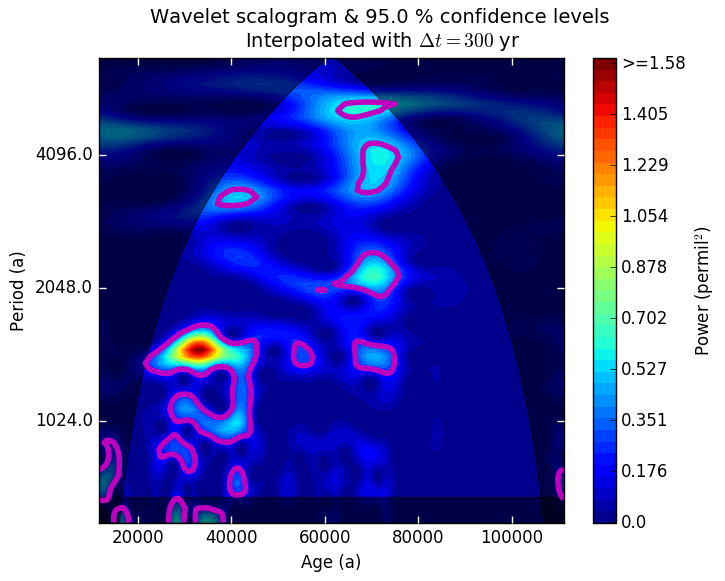

In [41]:
myplot=CWT_Morlet_regularly_sampled(myt,mydata,w0=15.,alpha_rn=alpha_rn,sigma_wn=sig_wn,t_axis_label="Age", mydata_axis_label="$\delta{}^{18}O$", t_units="a", mydata_units="permil",linewidth_cl=4)
myplot.suptitle("Wavelet scalogram & 95.0 % confidence levels\n Interpolated with $\Delta t=300$ yr",fontsize=14)
fig = plt.gcf() 
fig.set_size_inches(7.5,6)
myplot.savefig(mypath+"scalogram_w0_15_interpolated_data_300yr.pdf")
myplot.show()

In [42]:
os.chdir('../effect_interpolation')

# Compares raw and interpolated time series

See also http://matplotlib.org/1.3.1/mpl_toolkits/axes_grid/users/overview.html in case I want to improve the presentation

In [43]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [44]:
data=np.genfromtxt("GISP2/GISP2d18O.txt")
myt=data[:,0]
myt_interp=np.linspace(myt[0],myt[-1],int(np.floor((myt[-1]-myt[0])/30.)))
mydata=data[:,1]
mydata_cont_interp=interp1d(myt,mydata,kind='cubic')
mydata_interp=mydata_cont_interp(myt_interp)

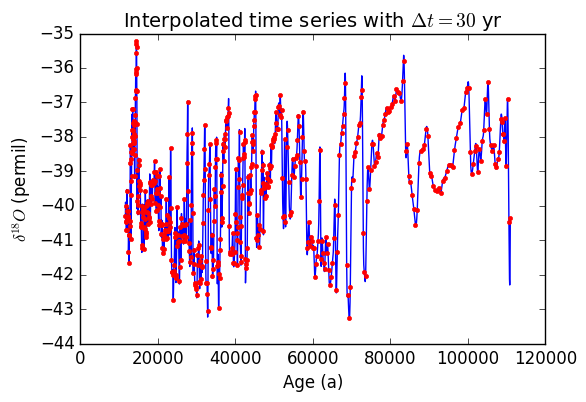

In [45]:
plt.plot(myt_interp,mydata_interp,'b')
plt.plot(myt,mydata,'r.')
plt.xlabel('Age (a)',fontsize=12)
plt.ylabel('$\delta{}^{18}O$ (permil)',fontsize=12)
plt.tick_params(labelsize=12)
plt.title("Interpolated time series with $\Delta t=30$ yr",fontsize=14)
plt.savefig(mypath+"raw_and_interpolated_data_30yr.pdf")
plt.show()

In [46]:
#myrange1=range(400,700)
#myrange2=range(156,227)
#plt.plot(myt_interp[myrange1],mydata_interp[myrange1],'b')
#plt.plot(myt[myrange2],mydata[myrange2],'r.')
#plt.xlabel('Age (a)',fontsize=12)
#plt.ylabel('$\delta{}^{18}O$ (permil)',fontsize=12)
#plt.tick_params(labelsize=12)
#plt.savefig(mypath+"raw_and_interpolated_data_ZOOM.pdf")
#plt.show()

In [47]:
data=np.genfromtxt("GISP2/GISP2d18O.txt")
myt=data[:,0]
myt_interp=np.linspace(myt[0],myt[-1],int(np.floor((myt[-1]-myt[0])/300.)))
mydata=data[:,1]
mydata_cont_interp=interp1d(myt,mydata,kind='cubic')
mydata_interp=mydata_cont_interp(myt_interp)

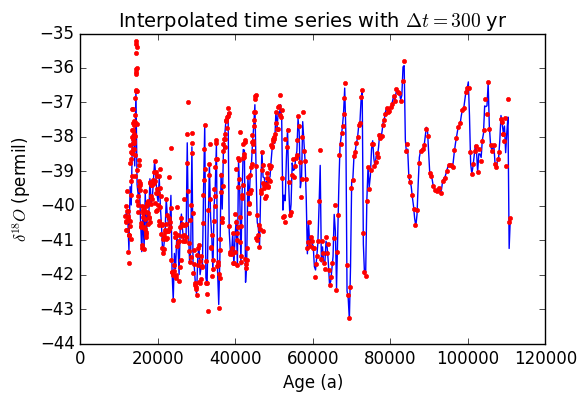

In [48]:
plt.plot(myt_interp,mydata_interp,'b')
plt.plot(myt,mydata,'r.')
plt.xlabel('Age (a)',fontsize=12)
plt.ylabel('$\delta{}^{18}O$ (permil)',fontsize=12)
plt.tick_params(labelsize=12)
plt.title("Interpolated time series with $\Delta t=300$ yr",fontsize=14)
plt.savefig(mypath+"raw_and_interpolated_data_300yr.pdf")
plt.show()